In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../../data/processed/Brazil/census_data/2010/weightening_area/universal_results/states/RS/'

In [3]:
categorie = 'Alfabetizacao.csv'
data = pd.read_csv(path+categorie)
data.head()

,Cod_ap,CD_GEOCODM,NM_MUNICIP,V001,V002,V003,V004,V005,V006,V007,...,V247,V248,V249,V250,V251,V252,V253,V254,V255,Unnamed: 172
0,4.300034e+12,4300034,ACEGUÁ,3841,19,50,61,87,75,79,...,18,249,839,444,39,26,15,46,4,0.0
1,4.300059e+12,4300059,ÁGUA SANTA,3277,25,40,38,46,50,61,...,27,142,881,384,30,11,17,30,9,0.0
2,4.300109e+12,4300109,AGUDO,14658,65,119,166,183,233,270,...,171,1377,3188,1550,306,97,63,268,14,0.0
3,4.300208e+12,4300208,AJURICABA,6417,21,38,77,68,77,107,...,97,608,1545,677,116,34,49,72,7,0.0
4,4.300307e+12,4300307,ALECRIM,6204,11,48,67,77,89,104,...,77,495,1565,618,103,41,28,71,17,0.0


In [4]:
columns = data.columns.values
constant_columns = (data != data.iloc[0]).any() == False
columns[constant_columns].tolist()

['Unnamed: 87', 'Unnamed: 172']

In [5]:
data_no_geo = data.drop(['Cod_ap', 'CD_GEOCODM', 'NM_MUNICIP'], axis=1)
sum(data_no_geo.duplicated())

0

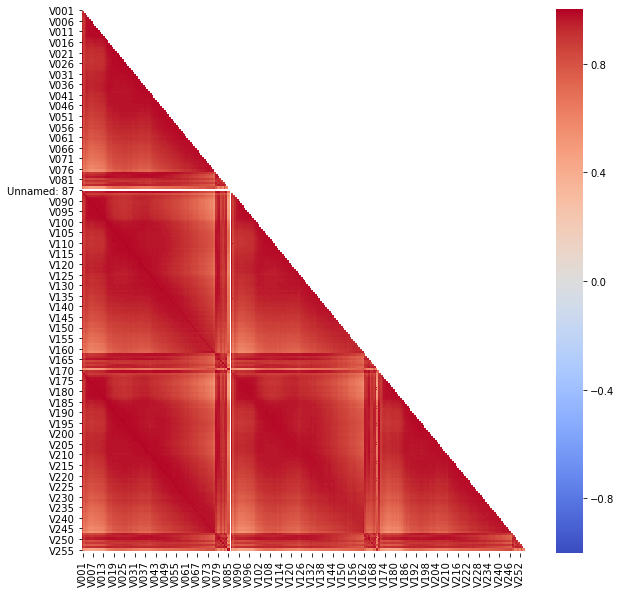

In [9]:
data_corr = data_no_geo.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(data_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

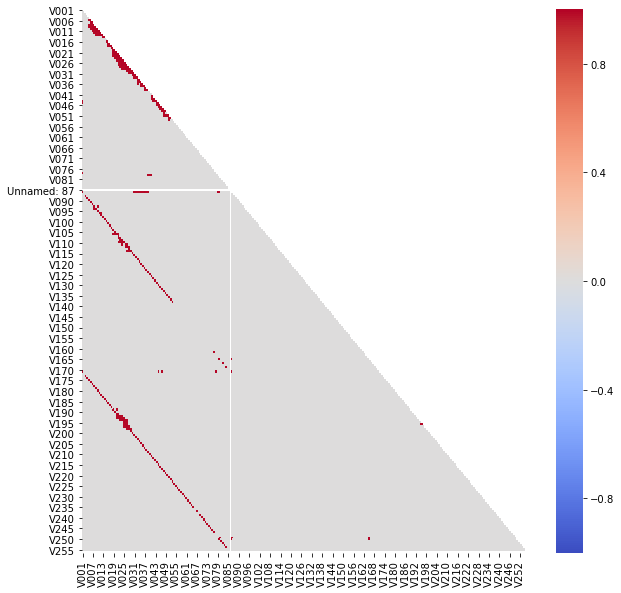

In [10]:
corr = data_corr.copy()
corr[np.abs(corr)<=0.99] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);

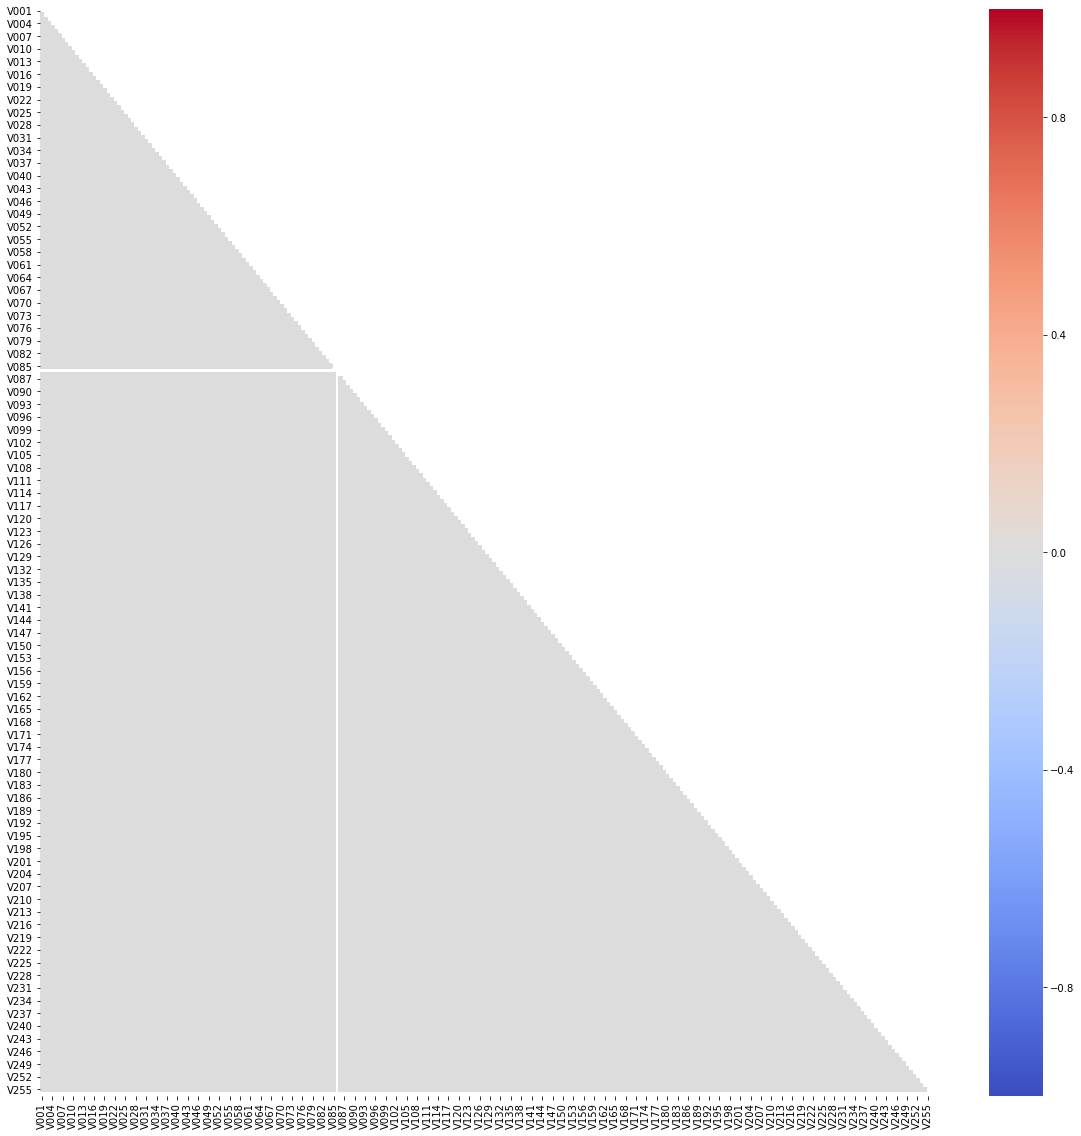

In [8]:
corr = data_corr.copy()
corr[np.abs(corr)< 1] = 0
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=False,
            mask=mask);